# SI 608


### Build graph


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from fuzzywuzzy import process

In [87]:
df = pd.read_csv("dblp_graph_conference_v12_new_author.csv")

In [ ]:
# exploded_author_ids = df['author_id'].str.split(';').explode()


# unique_author_ids = exploded_author_ids.unique()

# print("Unique Author IDs:", len(unique_author_ids))


In [ ]:
# from itertools import combinations
# unique_pairs = set()

# for _, group in df.groupby('id'):
#     all_authors = set(';'.join(group['author_id']).split(';'))

#     if len(all_authors) < 2:
#         continue

#     unique_pairs.update(combinations(sorted(all_authors), 2))
# print("Number of unique collaboration pairs:", len(unique_pairs))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097006 entries, 0 to 1097005
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   index            1097006 non-null  int64  
 1   author_id        1097006 non-null  int64  
 2   author_name      1097006 non-null  object 
 3   author_org       1008180 non-null  object 
 4   id               1097006 non-null  int64  
 5   title            1097006 non-null  object 
 6   year             1097006 non-null  int64  
 7   n_citation       1097006 non-null  int64  
 8   doc_type         1097006 non-null  object 
 9   reference_count  1097006 non-null  float64
 10  references       991470 non-null   object 
 11  venue_id         1097006 non-null  int64  
 12  venue_name       1097006 non-null  object 
 13  venue_type       1097006 non-null  object 
 14  doi              939216 non-null   object 
 15  keyword          1097006 non-null  object 
 16  volume           1

In [9]:
df.isnull().sum()

index                    0
author_id                0
author_name              0
author_org           88826
id                       0
title                    0
year                     0
n_citation               0
doc_type                 0
reference_count          0
references          105536
venue_id                 0
venue_name               0
venue_type               0
doi                 157790
keyword                  0
volume              947805
issue              1037011
publisher                0
dtype: int64

In [88]:
df["author_org"] = df["author_org"].fillna("unknown")


# df["reference_count"] = df["reference_count"].fillna(0)

# df["keyword"] = df["keyword"].fillna("unknown")

# df["publisher"] = df["publisher"].fillna("unknown")


Missing doi's do not affect the data and are not filled

Volume and issue are also not filled since there are too many vacancies


#### Title df to Author df


In [11]:
journal_cols = df.columns.to_list()[:3] + df.columns.to_list()[6:]
print(journal_cols)

['index', 'author_id', 'author_name', 'year', 'n_citation', 'doc_type', 'reference_count', 'references', 'venue_id', 'venue_name', 'venue_type', 'doi', 'keyword', 'volume', 'issue', 'publisher']


In [12]:
# rows = []


# for i in range(len(df)):
#     author_names = df["author_name"][i].split(";")
#     author_ids = df["author_id"][i].split(";")
#     author_orgs = str(df["author_org"][i]).split(";")
#     journal_values = {col: df[col][i] for col in journal_cols}

#     for j, author_id in enumerate(author_ids):
#         row = {
#             "index": i,
#             "author_id": author_id,
#             "author_name": author_names[j] if j < len(author_names) else np.nan,
#             "author_org": author_orgs[j] if j < len(author_orgs) else np.nan,
#         }
#         row.update(journal_values)
#         rows.append(row)


# author_df = pd.DataFrame(rows)


In [ ]:
author_df = df

In [14]:
# author_df["index"] = author_df["index"] + 1
# author_df["author_id"] = author_df["author_id"].astype(int)
# author_df['reference_count'] = author_df['reference_count'].astype(int)

#### Clean org


In [89]:
author_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097006 entries, 0 to 1097005
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   index            1097006 non-null  int64  
 1   author_id        1097006 non-null  int64  
 2   author_name      1097006 non-null  object 
 3   standard_org     1097006 non-null  object 
 4   id               1097006 non-null  int64  
 5   title            1097006 non-null  object 
 6   year             1097006 non-null  int64  
 7   n_citation       1097006 non-null  int64  
 8   doc_type         1097006 non-null  object 
 9   reference_count  1097006 non-null  float64
 10  references       991470 non-null   object 
 11  venue_id         1097006 non-null  int64  
 12  venue_name       1097006 non-null  object 
 13  venue_type       1097006 non-null  object 
 14  doi              939216 non-null   object 
 15  keyword          1097006 non-null  object 
 16  volume           1

In [16]:
author_df.isnull().sum()

index                    0
author_id                0
author_name              0
author_org               0
id                       0
title                    0
year                     0
n_citation               0
doc_type                 0
reference_count          0
references          105536
venue_id                 0
venue_name               0
venue_type               0
doi                 157790
keyword                  0
volume              947805
issue              1037011
publisher                0
dtype: int64

In [17]:
def clean_org(org):
    if "email" in org:
        org = org.rsplit(",", 1)[0]
    return org


author_df.loc[author_df["author_org"] == "nan", "author_org"] = "unknown"
author_df["author_org"] = author_df["author_org"].apply(
    lambda x: x.strip('"').replace("#TAB#", "").strip()
)

author_df["author_org"] = author_df["author_org"].apply(clean_org)

In [18]:
print(author_df["author_org"].value_counts())

author_org
unknown                                                                   153105
Carnegie - Mellon University                                                3996
Stanford, University                                                        2273
Carnegie-Mellon Univ., Pittsburgh, PA, USA                                  1954
Carnegie Mellon University, Pittsburgh Pa                                   1756
                                                                           ...  
IRIT-UPS, Toulouse Cedex, France                                               1
THALES Communications France, Colombes, France                                 1
LIRIS, Lyon 1 Univ., Lyon, France                                              1
INRP, ENS Cachan, Cachan, France                                               1
Archaeological Computing Research Group, University of Southampton, UK         1
Name: count, Length: 243247, dtype: int64


In [19]:
author_df["author_org"].isnull().sum()

np.int64(0)

In [20]:
# organization_names = author_df["author_org"].unique()

# standardized_dict = {}
# threshold = 85

# for org_name in organization_names:
#     if org_name in standardized_dict:
#         continue
#     if org_name == "unknown":
#         standardized_dict[org_name] = org_name
#         continue
#     if not org_name.strip():
#         continue

#     matched_name = None
#     for std_name in standardized_dict.keys():
#         if process.extractOne(org_name, [std_name])[1] >= threshold:
#             matched_name = std_name
#             break

#     if matched_name:
#         standardized_dict[org_name] = matched_name
#     else:
#         standardized_dict[org_name] = org_name

# author_df["standard_org"] = author_df["author_org"].map(standardized_dict)

In [21]:
# author_df["standard_org"].isnull().sum()

In [22]:
# print(author_df.loc[author_df["standard_org"].isna(), "author_org"])

In [23]:
# author_df["standard_org"].value_counts()

In [24]:
# author=author_df.drop(columns=["author_org"])
# author["standard_org"].fillna("unknown", inplace=True)

#### Other paper related attributes


In [ ]:
author = author_df
author.rename(columns={"author_org": "standard_org"}, inplace=True)

In [26]:
author["publisher"].value_counts()

publisher
IEEE                                                                                               376014
ACM                                                                                                164336
Springer, Berlin, Heidelberg                                                                       157110
unknown                                                                                            108753
Springer, Cham                                                                                      63753
                                                                                                    ...  
IEEE EMBS Int Conf Biomed Health Inform                                                                 1
The 26th International Conference on Software Engineering and Knowledge Engineering (SEKE 2014)         1
The 29th Pacific Asia Conference on Language, Information and Computation                               1
ACADEMIC PRESS LTD- ELSEVIER SCIENCE

In [82]:
author.head()

,index,author_id,author_name,standard_org,id,title,year,n_citation,doc_type,reference_count,references,venue_id,venue_name,venue_type,doi,keyword,volume,issue,publisher
0,0,2117665592,G. Earl,"Archaeological Computing Research Group, Unive...",1674,A methodology for the physically accurate visu...,2011,1,Conference,15.0,1535888970;1992876689;1993710814;2035653341;20...,2754954274,International Conference on Virtual Reality,C,https://doi.org/10.2312/VAST/VAST11/137-144,Statue;Engineering drawing;Virtual reconstruct...,NaN,NaN,Eurographics Association
1,1,2101415595,Dipankar Das,Department of Computer Science and Engineering...,9415,Identifying Psychological Theme Words from Emo...,2013,0,Conference,4.0,7678345;2032031606;2065586386;2079521622,2755612976,International Conference on Mining Intelligenc...,C,https://doi.org/10.1007/978-3-319-03844-5_71,Sadness;Rule-based system;Ranking;Disgust;Sham...,NaN,NaN,"Springer, Cham"
2,2,123621675,Serge Sharoff,unknown,15548,Cleaneval: a Competition for Cleaning Web Pages,2008,66,Conference,3.0,1963679817;1988325139;2014516359,1164963593,Language Resources and Evaluation,C,NaN,Web design;Web development;World Wide Web;Web ...,NaN,NaN,unknown
3,3,2137964017,Lidija Comic,unknown,16022,Algorithms for the Construction of Digital Con...,2007,0,Conference,4.0,1898259180;1977189574;2000938288;2005314985,2754545791,European Society for Fuzzy Logic and Technolog...,C,NaN,Convexity;Computer science;Fuzzy logic;Algorit...,NaN,NaN,unknown
4,4,2148789325,Prudence W. H. Wong,#N# University of Liverpool#N#,20175,An 8/3 Lower Bound for Online Dynamic Bin Packing,2012,6,Conference,15.0,1526652389;1549010977;1552828154;1589873279;19...,1175727152,International Symposium on Algorithms and Comp...,C,https://doi.org/10.1007/978-3-642-35261-4_8,Online algorithm;Discrete mathematics;Combinat...,NaN,NaN,"Springer, Berlin, Heidelberg"


In [ ]:
author["venue_name"].value_counts()

venue_name
National Conference on Artificial Intelligence                                     15827
Computer Vision and Pattern Recognition                                            15516
International Conference on Acoustics, Speech, and Signal Processing               13433
International Conference on Robotics and Automation                                12741
International Conference on Image Processing                                       11525
                                                                                   ...  
International Symposium on Power Electronics for Distributed Generation Systems        1
IEEE International Conference on Circuits and Systems for Communications               1
European Conference on Radiation and Its Effects on Components and Systems             1
Self-Sustaining Systems                                                                1
International Conference on Software Technology and Engineering                        1
Name: coun

### Split train and validation


In [ ]:
valid = author.sort_values("year", ascending=False).groupby("author_id").head(1)
train = author[~author["id"].isin(valid["id"])]

print(f"Train size: {len(train)}, Validation size: {len(valid)}")


Train size: 1048286, Validation size: 29694


In [ ]:
data = pd.concat([train, valid], ignore_index=True)

data["references_parsed"] = data["references"].apply(
    lambda refs: [int(ref) for ref in refs.split(";")]
    if pd.notna(refs) and refs
    else []
)

print(f"Total nodes in data: {len(data)}")
print(f"Sample data:\n{data.head()}")


Total nodes in data: 1077980
Sample data:
   index   author_id          author_name  \
0      0  2117665592              G. Earl   
1      1  2101415595         Dipankar Das   
2      2   123621675        Serge Sharoff   
3      3  2137964017         Lidija Comic   
4      4  2148789325  Prudence W. H. Wong   

                                        standard_org     id  \
0  Archaeological Computing Research Group, Unive...   1674   
1  Department of Computer Science and Engineering...   9415   
2                                            unknown  15548   
3                                            unknown  16022   
4                     #N# University of Liverpool#N#  20175   

                                               title  year  n_citation  \
0  A methodology for the physically accurate visu...  2011           1   
1  Identifying Psychological Theme Words from Emo...  2013           0   
2    Cleaneval: a Competition for Cleaning Web Pages  2008          66   
3  Algorithm

In [ ]:
import networkx as nx

G = nx.DiGraph()
for _, row in data.iterrows():
    for ref in row["references_parsed"]:
        G.add_edge(row["id"], ref)

print(f"Number of nodes in graph: {G.number_of_nodes()}")
print(f"Number of edges in graph: {G.number_of_edges()}")

Number of nodes in graph: 1589539
Number of edges in graph: 8800995


In [ ]:
isolated_nodes = list(nx.isolates(G))
print(f"Number of isolated nodes: {len(isolated_nodes)}")


Number of isolated nodes: 0


In [ ]:
# Degree
degree = nx.degree_centrality(G)

# PageRank
pagerank = nx.pagerank(G)

# Clustering Coefficient
clustering_coefficient = nx.clustering(G.to_undirected())

data["degree"] = data["id"].map(degree).fillna(0)
data["pagerank"] = data["id"].map(pagerank).fillna(0)
data["clustering_coefficient"] = data["id"].map(clustering_coefficient).fillna(0)

print(data[["id", "degree", "pagerank", "clustering_coefficient"]].head())

      id    degree      pagerank  clustering_coefficient
0   1674  0.000009  4.083786e-07                0.076190
1   9415  0.000003  4.083786e-07                0.000000
2  15548  0.000011  1.446101e-06                0.071895
3  16022  0.000003  4.083786e-07                0.000000
4  20175  0.000010  4.365232e-07                0.241667


In [ ]:
train = data[data["id"].isin(train["id"])]
valid = data[data["id"].isin(valid["id"])]

print(f"Train shape: {train.shape}")
print(f"Valid shape: {valid.shape}")

Train shape: (1048286, 23)
Valid shape: (29694, 23)


In [ ]:
import pandas as pd
import torch

y_train = torch.tensor(train["n_citation"].values, dtype=torch.float)
y_valid = torch.tensor(valid["n_citation"].values, dtype=torch.float)

train_combined = train[
    ["id", "degree", "pagerank", "clustering_coefficient", "year", "n_citation"]
].copy()
train_combined["log_n_citation"] = np.log1p(train_combined["n_citation"])

valid_combined = valid[
    ["id", "degree", "pagerank", "clustering_coefficient", "year", "n_citation"]
].copy()
valid_combined["log_n_citation"] = np.log1p(valid_combined["n_citation"])

print("Train combined:\n", train_combined.head())
print("Valid combined:\n", valid_combined.head())


Train combined:
       id    degree      pagerank  clustering_coefficient  year  n_citation  \
0   1674  0.000009  4.083786e-07                0.076190  2011           1   
1   9415  0.000003  4.083786e-07                0.000000  2013           0   
2  15548  0.000011  1.446101e-06                0.071895  2008          66   
3  16022  0.000003  4.083786e-07                0.000000  2007           0   
4  20175  0.000010  4.365232e-07                0.241667  2012           6   

   log_n_citation  
0        0.693147  
1        0.000000  
2        4.204693  
3        0.000000  
4        1.945910  
Valid combined:
                  id    degree      pagerank  clustering_coefficient  year  \
1048286  2995720360  0.000000  0.000000e+00                0.000000  2020   
1048287  2997803662  0.000000  0.000000e+00                0.000000  2020   
1048288  2997662139  0.000021  4.083786e-07                0.058824  2020   
1048289  3001954018  0.000000  0.000000e+00                0.000000  

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_features = ["degree", "pagerank", "clustering_coefficient", "year"]

# 归一化
scaler = MinMaxScaler()
train_combined[numeric_features] = scaler.fit_transform(
    train_combined[numeric_features]
)
valid_combined[numeric_features] = scaler.transform(valid_combined[numeric_features])

print("Normalized train_combined:\n", train_combined.head())


Normalized train_combined:
       id    degree  pagerank  clustering_coefficient      year  n_citation  \
0   1674  0.005183  0.004006                0.076190  0.844828           1   
1   9415  0.001382  0.004006                0.000000  0.879310           0   
2  15548  0.006220  0.014187                0.071895  0.793103          66   
3  16022  0.001382  0.004006                0.000000  0.775862           0   
4  20175  0.005529  0.004282                0.241667  0.862069           6   

   log_n_citation  
0        0.693147  
1        0.000000  
2        4.204693  
3        0.000000  
4        1.945910  


In [ ]:
final_features = numeric_features + ["paper_age"]

X_train = train_combined[final_features].values
y_train = train_combined["log_n_citation"]

X_valid = valid_combined[final_features].values
y_valid = valid_combined["log_n_citation"]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_valid_pred_rf = rf_model.predict(X_valid)

y_valid_pred_rf_exp = np.expm1(y_valid_pred_rf)
y_valid_exp = np.expm1(y_valid)

mse_rf = mean_squared_error(y_valid_exp, y_valid_pred_rf_exp)
r2_rf = r2_score(y_valid_exp, y_valid_pred_rf_exp)

print(f"Random Forest Validation MSE: {mse_rf:.4f}")
print(f"Random Forest Validation R² Score: {r2_rf:.4f}")


Random Forest Validation MSE: 93.7216
Random Forest Validation R² Score: 0.7655


In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42
)
xgb_model.fit(X_train, y_train)

y_valid_pred_xgb = xgb_model.predict(X_valid)

y_valid_pred_xgb_exp = np.expm1(y_valid_pred_xgb)
mse_xgb = mean_squared_error(y_valid_exp, y_valid_pred_xgb_exp)
r2_xgb = r2_score(y_valid_exp, y_valid_pred_xgb_exp)

print(f"XGBoost Validation MSE: {mse_xgb:.4f}")
print(f"XGBoost Validation R² Score: {r2_xgb:.4f}")


XGBoost Validation MSE: 91.2820
XGBoost Validation R² Score: 0.7716


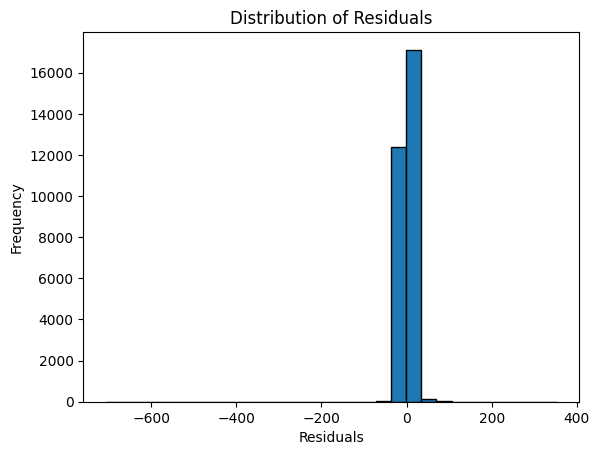

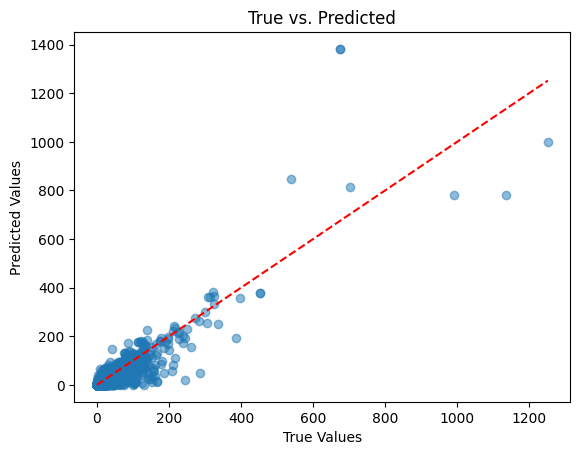

In [ ]:
import matplotlib.pyplot as plt

residuals = y_valid_exp - y_valid_pred_xgb_exp
plt.hist(residuals, bins=30, edgecolor="k")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

plt.scatter(y_valid_exp, y_valid_pred_xgb_exp, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted")
plt.plot(
    [y_valid_exp.min(), y_valid_exp.max()],
    [y_valid_exp.min(), y_valid_exp.max()],
    color="red",
    linestyle="--",
)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [4, 6, 8],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
}
xgb_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(
    xgb_model, param_grid=params, scoring="neg_mean_squared_error", cv=3, verbose=1
)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300, 'subsample': 1.0}


In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42
)
xgb_model.fit(X_train, y_train)

y_valid_pred_xgb = xgb_model.predict(X_valid)

y_valid_pred_xgb_exp = np.expm1(y_valid_pred_xgb)
mse_xgb = mean_squared_error(y_valid_exp, y_valid_pred_xgb_exp)
r2_xgb = r2_score(y_valid_exp, y_valid_pred_xgb_exp)

print(f"XGBoost Validation MSE: {mse_xgb:.4f}")
print(f"XGBoost Validation R² Score: {r2_xgb:.4f}")

XGBoost Validation MSE: 82.1710
XGBoost Validation R² Score: 0.7944


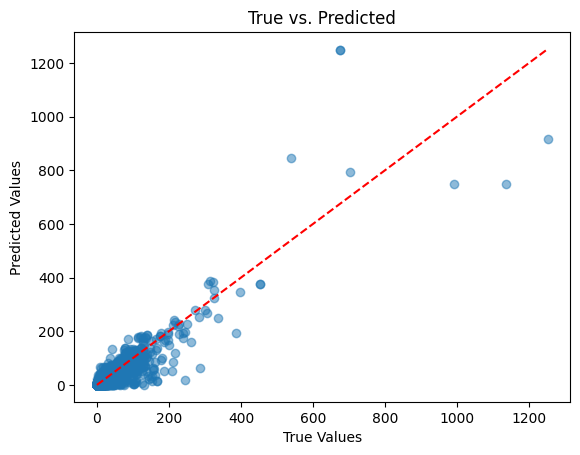

In [ ]:
plt.scatter(y_valid_exp, y_valid_pred_xgb_exp, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted")
plt.plot(
    [y_valid_exp.min(), y_valid_exp.max()],
    [y_valid_exp.min(), y_valid_exp.max()],
    color="red",
    linestyle="--",
)
plt.show()